In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from GeneticFeatures.GeneticFeatureGenerator import *
from GeneticFeatures.Node import *

from tester import *

In [7]:
def add(x, y):
    return x + y

def sub(x, y):
    return x - y

def mul(x, y):
    return x * y

def div(x, y):
    return x / (y + 1e-10)

def hyp(x, y):
    if isinstance(x, float) and isinstance(y, float):
        return np.hypot(x, y)
    if isinstance(x, float):
        x = np.ones_like(y) * x
    if isinstance(y, float):
        y = np.ones_like(x) * y
    return np.hypot(x, y)

def log(x, y):
    if isinstance(x, float) and isinstance(y, float):
        return np.log(np.hypot(x, y) + 1e-10)
    if isinstance(x, float):
        x = np.ones_like(y) * x
    if isinstance(y, float):
        y = np.ones_like(x) * y
    return np.log(np.hypot(x, y) + 1e-10)

In [8]:
generator = GeneticFeatureGenerator(
    [add, sub, mul, div, hyp, log],
    operation_names = ["+", "-", "*", "/", "hyp", "log"],
    popsize = 120, 
    maxiter = 200, 
    mutation_rate = 0.05,
    max_tree_depth = 4
)

In [9]:
dataset = pd.read_csv("csv/water_potability.csv")
dataset.dropna(inplace=True)
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values
dataset

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


In [10]:
tester = tester(X, y, generator, 10, 2, 1000, verbose = True, test_size = 0.3, random_state = 17)

Split:  0 Feature:  0
Iteration:  199 Best fitness:  0.10152607808857805 Generation best 0.09055701243201242
Split:  1 Feature:  1


In [ ]:
for tree in tester.trees:
    tree.root.update_depth(1)
    print(tree.root.get_max_depth())

4
4
4
4
4
4
4
4
4
3


In [ ]:
tester.test_models(notests=8)

Iteration 4 - MSE 2.604865204166544, R2 0.08171595480898797, MAE 1.25399055210225, NEW_MSE 2.3649058340950115, NEW_R2 0.16630799461139978, NEW_MAE 1.1915442755298944
Iteration 4 - MSE 3.1962691859386765, R2 -0.1267696281897488, MAE 1.419650194095522, NEW_MSE 3.4106155675571626, NEW_R2 -0.20233241050564144, NEW_MAE 1.4494713166468485
Iteration 4 - MSE 2.648539522973334, R2 0.06631959952706723, MAE 1.2682287492541695, NEW_MSE 2.6419127460645653, NEW_R2 0.06865571407788129, NEW_MAE 1.2376245826882246


In [ ]:
tester.get_tests()

,Model,MSE,R2,MAE,NEW_MSE,NEW_R2,NEW_MAE
0,RandomForestRegressor,2.604865,0.081716,1.253991,2.364906,0.166308,1.191544
1,MLPRegressor,3.310873,-0.167170,1.421696,3.368842,-0.187606,1.441659
2,GradientBoostingRegressor,2.648540,0.066320,1.268229,2.641913,0.068656,1.237625


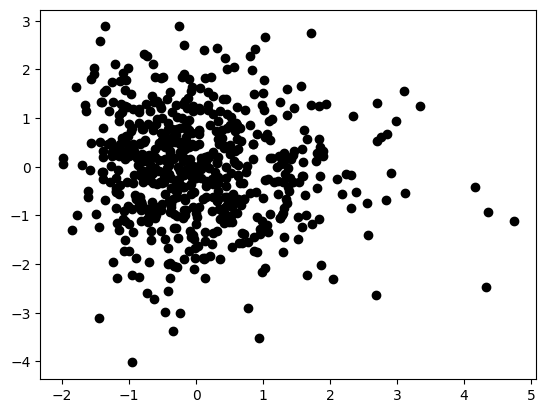

Min:  -1.9901509694543311 Max:  4.742976651738574 Mean:  0.05910752203278918 Std:  1.034347118687857


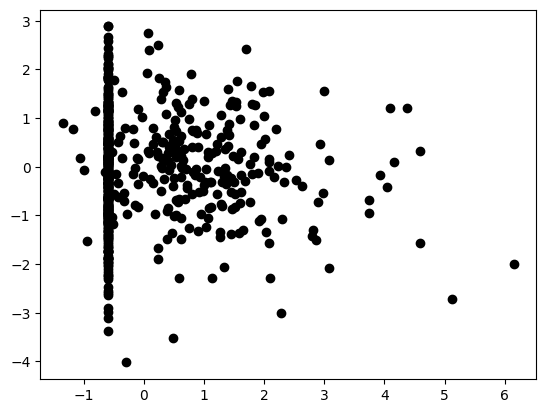

Min:  -1.3455903309510608 Max:  6.147430757955143 Mean:  0.07706567824321914 Std:  1.0826039421095592


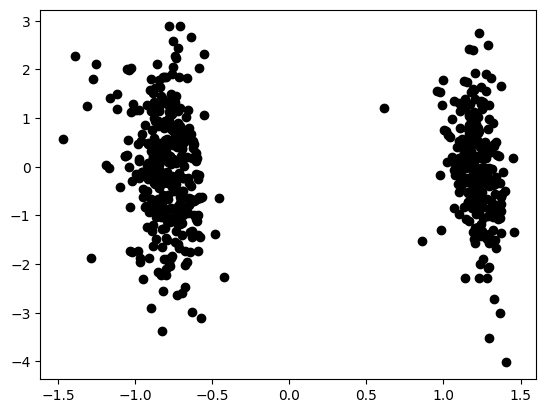

Min:  -1.4709082796479445 Max:  1.4555347270134409 Mean:  0.024450909897011996 Std:  0.9978026745685005


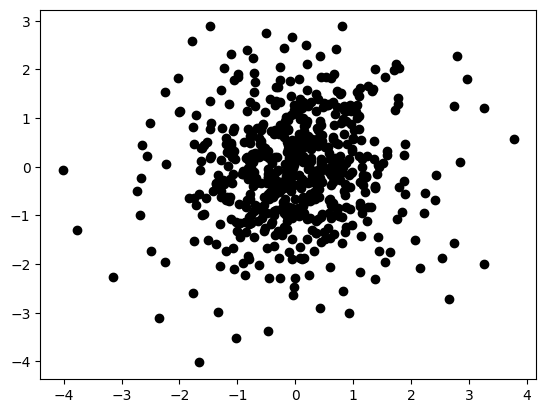

Min:  -4.015256333586602 Max:  3.773609041959379 Mean:  -0.006225903687622039 Std:  1.0152799005675024


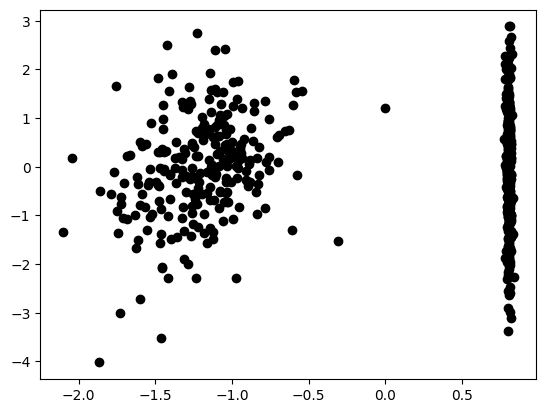

Min:  -2.1026553368272243 Max:  0.8366870445669679 Mean:  -0.01730987683578432 Std:  1.0029586273396818


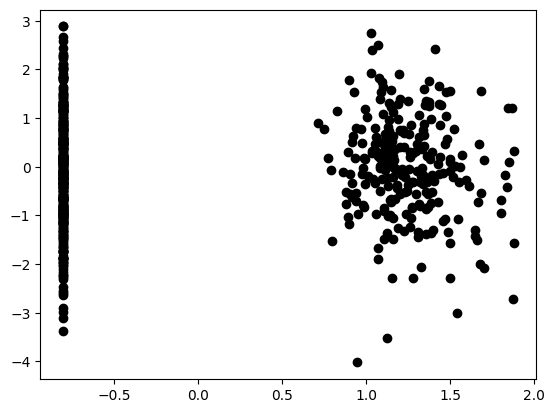

Min:  -0.8078349907750224 Max:  1.877524642806862 Mean:  0.03456571395909864 Std:  1.0206654171572385


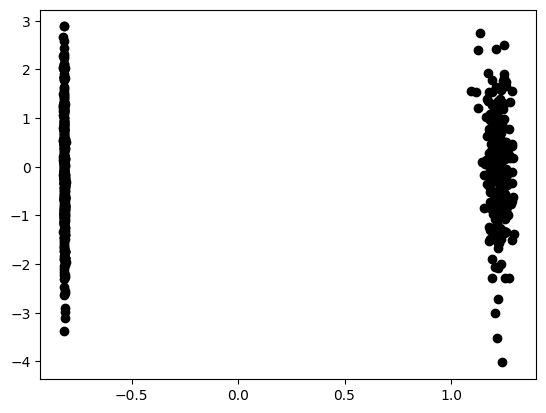

Min:  -0.8235653192753851 Max:  1.2944245158178056 Mean:  0.020166952330000244 Std:  1.0027736278465598


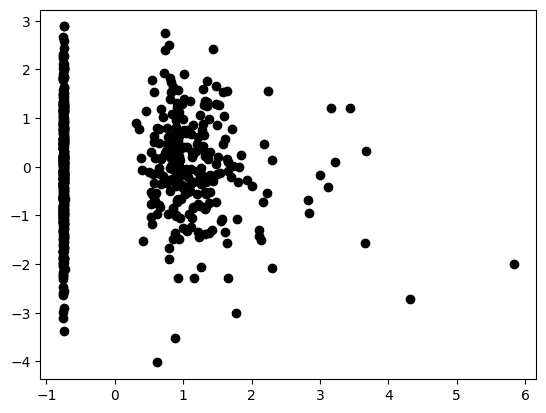

Min:  -0.7593803524073286 Max:  5.832217934996651 Mean:  0.050444481151286406 Std:  1.0491153608236135


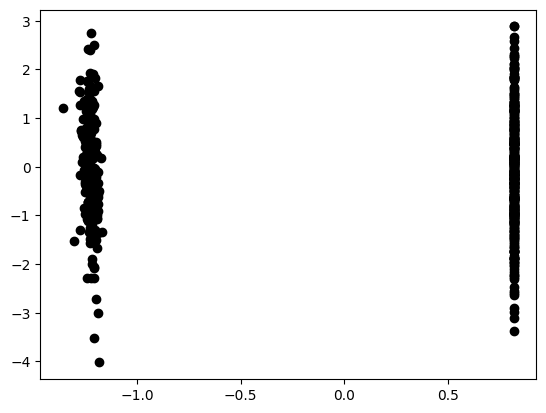

Min:  -1.3581768703736954 Max:  0.8166687115068325 Mean:  -0.021735210098702426 Std:  1.004611449459638


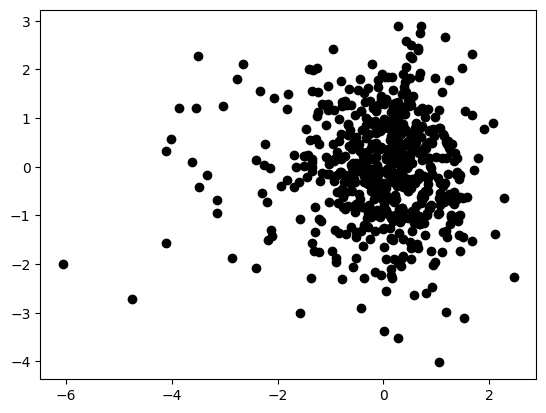

Min:  -6.057944855542053 Max:  2.460697174951689 Mean:  -0.03429936784610813 Std:  1.0375332647000313


In [ ]:
for i in range(tester.X_test.shape[1],tester.new_X_test.shape[1]):
    plt.clf()
    plt.scatter(tester.new_X_test[:,i], tester.y_test, color = 'black')
    plt.show()
    print("Min: ", tester.new_X_test[:, i].min(), "Max: ", tester.new_X_test[:, i].max(), "Mean: ", tester.new_X_test[:, i].mean(), "Std: ", tester.new_X_test[:, i].std())